# From Statistical Physics to Data-Driven Modelling with Applications to Quantitative Biology

Tutorial 6 : Online sparse principal component analysis of neural assemblies.

This tutorial is based on the same data set of Tutorial 3,  taken from the work:

Replay of rule-learning related neural patterns in the prefrontal cortex during sleep, A. Peyrache, K. Benchenane, M. Khamassi, S. I. Wiener, F. P. Battaglia, Nature Neuroscience, DOI:10.1038/nn.2337 (2009).

Starting Notebook SC RM FZ.

In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["figure.figsize"] = (10, 8)
#plt.rcParams["font.size"] = 26

from scipy.sparse import coo_matrix
import numpy.matlib
from numpy import linalg as LA


Import data

In [2]:
data1=np.loadtxt('./Data/Dati_181014_maze.txt')
datatask=data1.astype(int)

Raster Plot of the first 10 seconds of the recorded activity

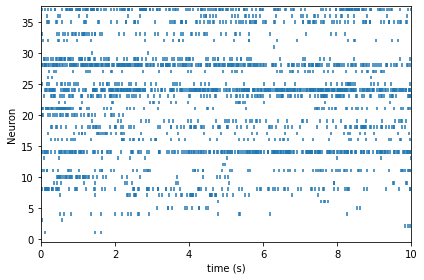

In [3]:
#Question 1: Raster Plot
raster=data1
tmin=np.min(raster[:,0])
tmax=np.max(raster[:,0])
plt.xlim([0,10])
plt.ylim([-0.5,37.5])
plt.vlines((raster[:,0]-tmin)/10000,raster[:,1]-0.3,raster[:,1]+0.3)
plt.xlabel('time (s)')
plt.ylabel('Neuron')
#plt.title('Raster plot')
plt.tight_layout()
plt.show()


# Principal component analysis (off-line learning) taken from Tutorial 3.

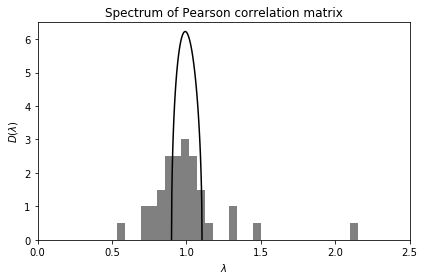

Number of eigenvalues > lp:  6


In [9]:
#Define Pearson matrix

#Pearson matrix
def Zscore(data):
    #time bin (in units of 0.1ms)
    dt=1000
    L=np.amax(data[:,1])
    Tmin=np.amin(data[:,0])
    Tmax=np.amax(data[:,0])
    T=Tmax-Tmin
    M=(T//dt)+1
    s=np.zeros((M,L),dtype=np.int)
    for k in range(len(data)):
        s[(data[k,0]-Tmin)//dt,data[k,1]-1]+=1
    #Alternative way, using sparse matrices
    #x=(data[:,0]-Tmin)//dt
    #y=data[:,1]-1
    #z=np.ones(np.size(data,0))
    #st=coo_matrix((z,(x,y)),dtype=np.int8,shape=(B,N))    
    #s=np.asarray(st)
    p=np.mean(s, axis=0, dtype=np.float64)
    sigma=np.sqrt(np.var(s, axis=0, dtype=np.float64, ddof=1))
    y=(s-p)/sigma
    return y.astype(np.float64)

#compute Pearson matrix for data and diagonalize it
Y=Zscore(datatask)
C=np.dot(Y.T,Y)/np.size(Y,0)
w, v = LA.eig(C)

#plot eigenvalue distribution
r=np.size(Y,1)/np.size(Y,0)
lp=(1+np.sqrt(r))**2
lm=(1-np.sqrt(r))**2
x=np.zeros((2,101))
for i in range(101):
    t=lm+(lp-lm)*i/100
    x[0,i]=t
    x[1,i]=np.sqrt((lp-t)*(t-lm))/(t*r)/(2*math.pi)
plt.hist(w, bins=30, normed=True, facecolor='grey')
plt.plot(x[0,:],x[1,:],'black')
plt.xlim([0,2.5])
plt.ylim([0,6.5])
plt.xlabel('$\lambda$')
plt.ylabel('$D(\lambda)$')
plt.title('Spectrum of Pearson correlation matrix')
plt.tight_layout()
#plt.savefig('PCA-task.pdf')
plt.show()


print('Number of eigenvalues > lp: ',len(np.where(w>lp)[0]))

2.1505329296818276 
 [-0.30575564  0.011962    0.00778311  0.00506386 -0.00252716 -0.01322397
 -0.09040398 -0.16575109 -0.27394546 -0.16083999 -0.16557683 -0.00855851
 -0.0309192   0.18770264  0.01711809 -0.10031741  0.13603484 -0.19069276
  0.03161871 -0.48857061 -0.42966552 -0.00084054 -0.07465402  0.09245687
 -0.10297825 -0.29401518  0.22419096 -0.06819083 -0.11757315  0.00927365
 -0.01872674 -0.09513298  0.01027532  0.05442999 -0.12028375  0.02597055
 -0.09338114]


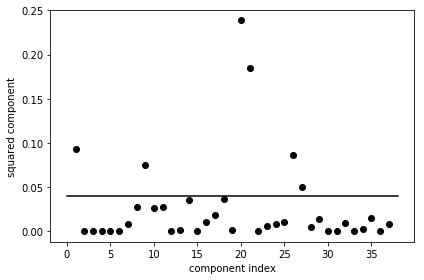

[ 1  9 20 21 26 27]


In [10]:
# Neurons that contribute the most to the largest eigenvector in the task 

v0=np.copy(v[:,0])
print(w[0],'\n',v0)
plt.plot(np.arange(1,v0.shape[0]+1),v0**2,'ko')
plt.plot([0,v0.shape[0]+1],[0.2**2,0.2**2],'black')
#plt.title('Squared components of largest eigenvector')
plt.xlabel('component index')
plt.ylabel('squared component')
plt.tight_layout()
#plt.savefig('taskcellassembly.pdf')
plt.show()
print(np.where(abs(v0)>0.2)[0]+1)

 Question 1: Write the algotithm for the on-line learning of the Principal Component of the Pearson Correlation Matrix.

Question 2: Plot the scalar product between the principal component and its estimate with the online learning procedure of the previous question as a function of eta. 

Question 3: verify Instability at large eta eg.eta=0.01.

Question 4: Plot the squared component of the  online principal component   and compare with the ones obtained for the offline principal component for eta=0.0004.

Question 5: Write the code for the Online Sparse Principal Component Analysis.

Question 6: Discuss the dependence of the norm of the Online Sparse Principal Component  on the regularisation parameter γ, keeping fixed eta=0.0004, and identify the critical value γc at which the norm become zero>

Plot the online sparse PCA for  γ=0.1,0.2,0.3. Compare with the results for online PCA and PCA. 

Question 8 (Bonus): repeat the online PCA  learning procedure with a number of passes Npass =25  over the data set and compare with PCA.

Online PCA with Npass=25

Online Sparse PCA with Npass=25